In [120]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv("finalDataWithPopulation3.csv")

In [3]:
data.head()

,Unnamed: 0,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Road_Type,Population
0,0,2,77.0,62.0,29.92,10.0,5.0,tertiary,4468976
1,1,2,45.0,48.0,29.91,10.0,5.0,tertiary,7078515
2,2,2,68.0,73.0,29.79,10.0,13.0,tertiary,33871648
3,3,2,27.0,86.0,28.49,10.0,15.0,primary,4919479
4,4,2,42.0,34.0,29.77,10.0,0.0,residential,33871648


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19988 entries, 0 to 19987
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19988 non-null  int64  
 1   Severity         19988 non-null  int64  
 2   Temperature(F)   19988 non-null  float64
 3   Humidity(%)      19988 non-null  float64
 4   Pressure(in)     19988 non-null  float64
 5   Visibility(mi)   19988 non-null  float64
 6   Wind_Speed(mph)  19988 non-null  float64
 7   Road_Type        19988 non-null  object 
 8   Population       19988 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 1.4+ MB


In [5]:
data = data.drop(columns=["Unnamed: 0"])

In [6]:
data.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Road_Type,Population
0,2,77.0,62.0,29.92,10.0,5.0,tertiary,4468976
1,2,45.0,48.0,29.91,10.0,5.0,tertiary,7078515
2,2,68.0,73.0,29.79,10.0,13.0,tertiary,33871648
3,2,27.0,86.0,28.49,10.0,15.0,primary,4919479
4,2,42.0,34.0,29.77,10.0,0.0,residential,33871648


C:\Users\marci\AppData\Local\Temp\ipykernel_19548\3979677805.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = plotData.groupby(['temp_bin', 'Severity']).size().reset_index(name='count')


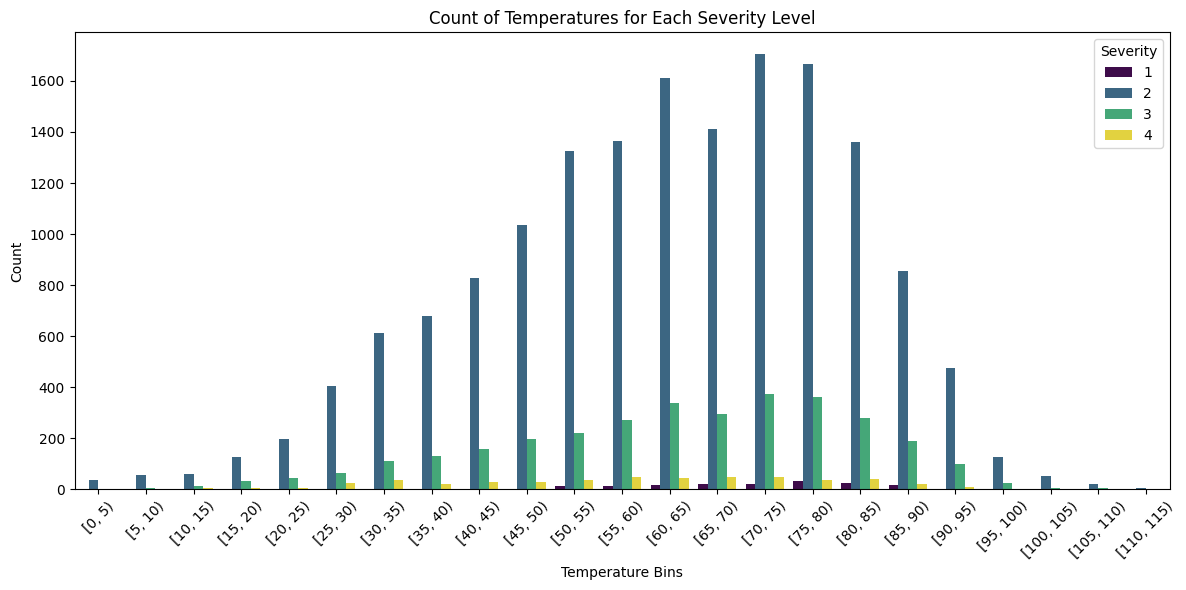

In [7]:
bin_edges = np.arange(0, 120, 5)
plotData = data.copy()
plotData['temp_bin'] = pd.cut(plotData['Temperature(F)'], bins=bin_edges, right=False)

counts = plotData.groupby(['temp_bin', 'Severity']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='temp_bin', y='count', hue='Severity', palette='viridis')

plt.title('Count of Temperatures for Each Severity Level')
plt.xlabel('Temperature Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_19548\3118167641.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = plotData.groupby(['humidity_bin', 'Severity']).size().reset_index(name='count')


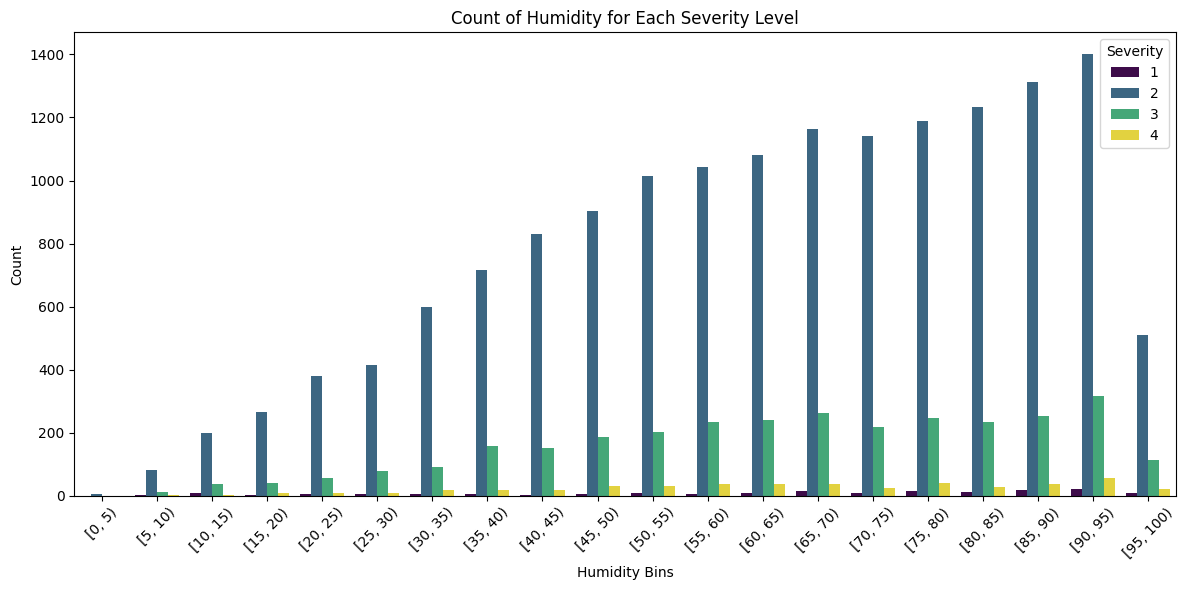

In [8]:
bin_edges = np.arange(0, 105, 5)
plotData = data.copy()
plotData['humidity_bin'] = pd.cut(plotData['Humidity(%)'], bins=bin_edges, right=False)

counts = plotData.groupby(['humidity_bin', 'Severity']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='humidity_bin', y='count', hue='Severity', palette='viridis')

plt.title('Count of Humidity for Each Severity Level')
plt.xlabel('Humidity Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_19548\2147545684.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = plotData.groupby(['pressure_bin', 'Severity']).size().reset_index(name='count')


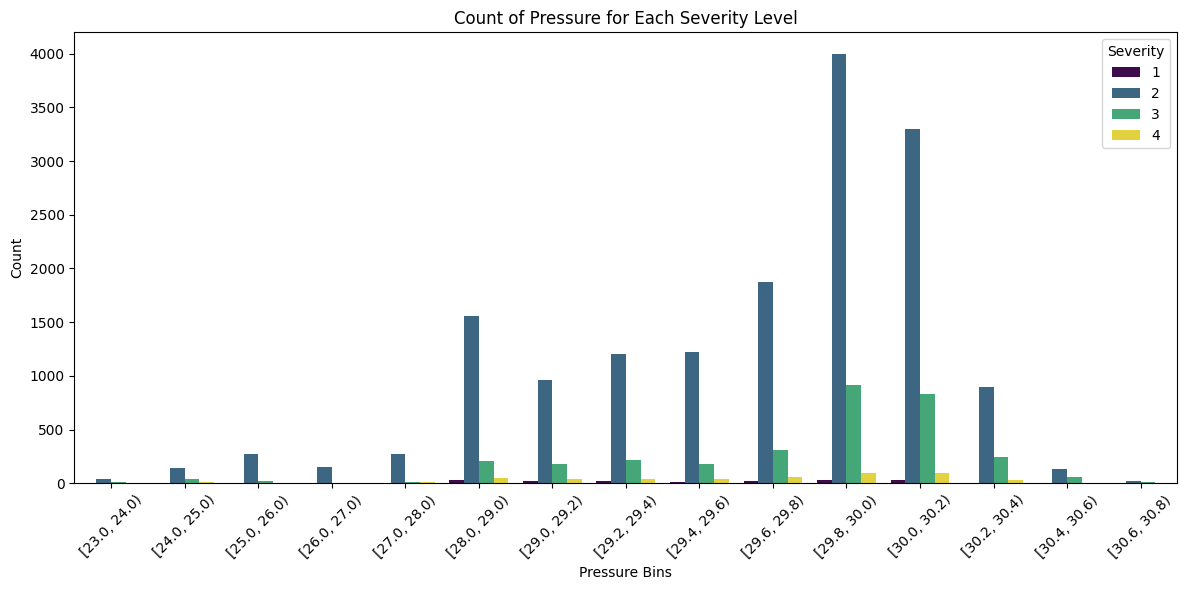

In [9]:
bin_edges = np.concatenate([np.arange(23, 29, 1), np.arange(29, 31, 0.2)])
plotData = data.copy()
plotData['pressure_bin'] = pd.cut(plotData['Pressure(in)'], bins=bin_edges, right=False)

counts = plotData.groupby(['pressure_bin', 'Severity']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='pressure_bin', y='count', hue='Severity', palette='viridis')

plt.title('Count of Pressure for Each Severity Level')
plt.xlabel('Pressure Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_19548\2324804421.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = plotData.groupby(['visibility_bin', 'Severity']).size().reset_index(name='count')


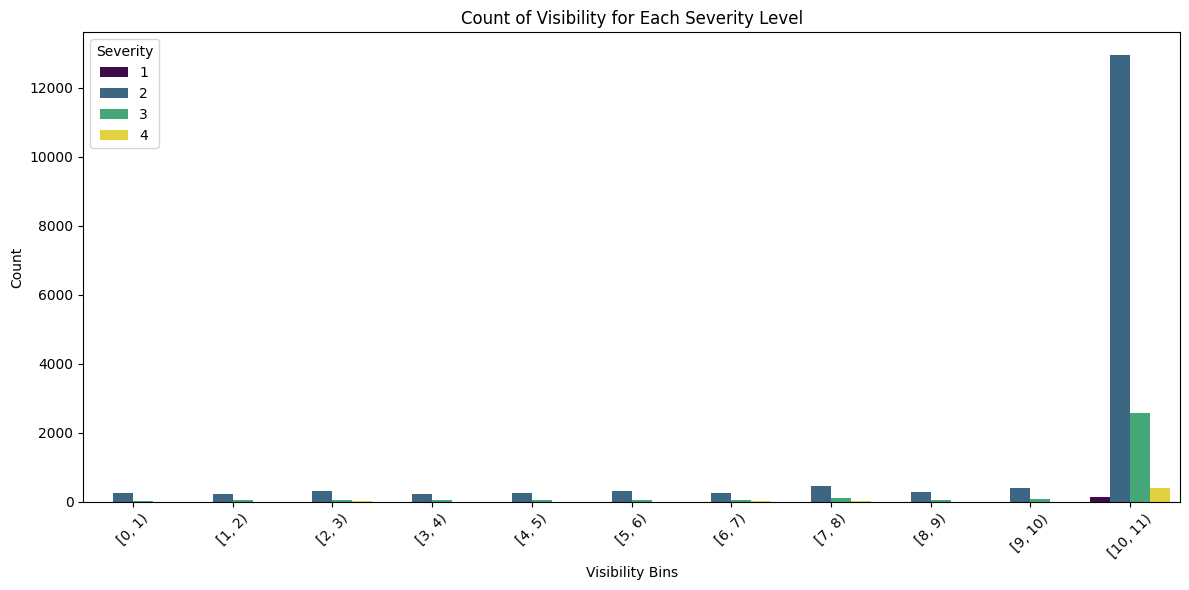

In [10]:
bin_edges = np.arange(0, 12, 1)
plotData = data.copy()
plotData['visibility_bin'] = pd.cut(plotData['Visibility(mi)'], bins=bin_edges, right=False)

counts = plotData.groupby(['visibility_bin', 'Severity']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='visibility_bin', y='count', hue='Severity', palette='viridis')

plt.title('Count of Visibility for Each Severity Level')
plt.xlabel('Visibility Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

C:\Users\marci\AppData\Local\Temp\ipykernel_19548\4112548768.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = plotData.groupby(['wind_speed_bin', 'Severity']).size().reset_index(name='count')


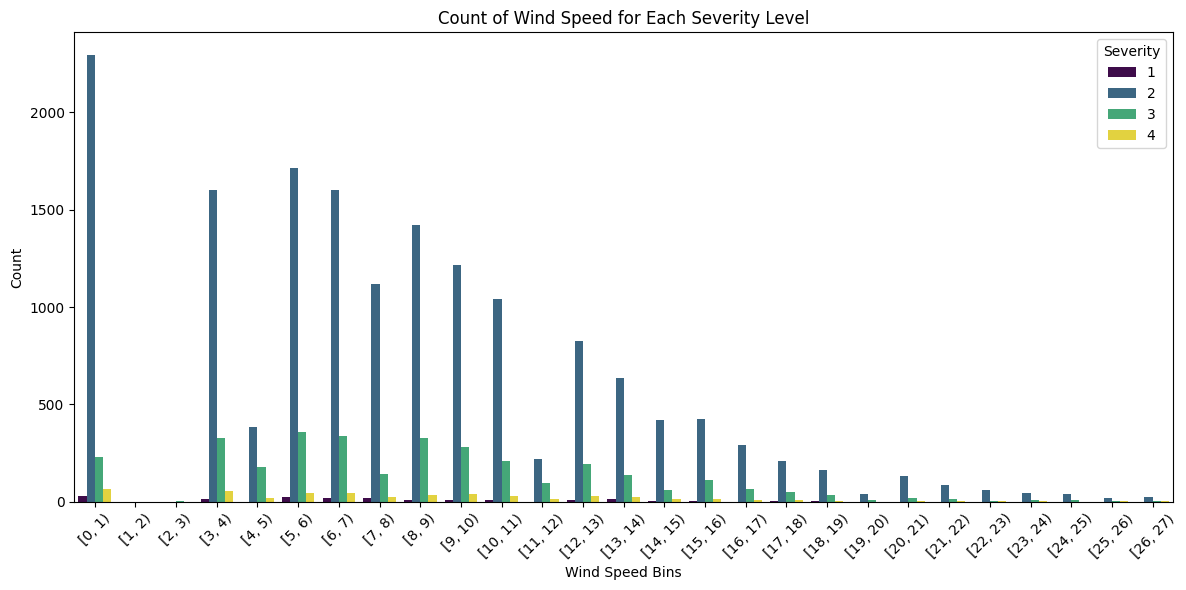

In [11]:
bin_edges = np.arange(0, 28, 1)
plotData = data.copy()
plotData['wind_speed_bin'] = pd.cut(plotData['Wind_Speed(mph)'], bins=bin_edges, right=False)

counts = plotData.groupby(['wind_speed_bin', 'Severity']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='wind_speed_bin', y='count', hue='Severity', palette='viridis')

plt.title('Count of Wind Speed for Each Severity Level')
plt.xlabel('Wind Speed Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

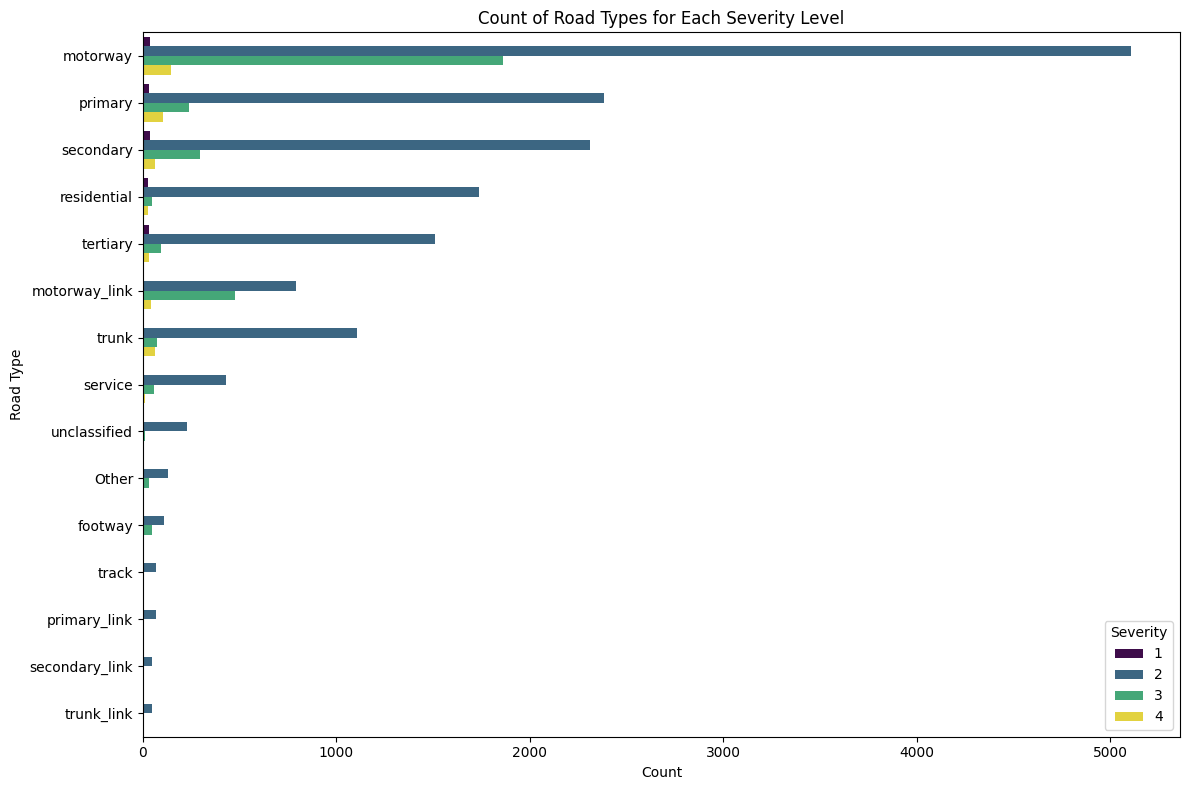

In [12]:
plotData = data.copy()
threshold = 50
road_type_counts = plotData['Road_Type'].value_counts()
less_frequent = road_type_counts[road_type_counts < threshold].index
plotData['Road_Type'] = plotData['Road_Type'].replace(less_frequent, 'Other')

sorted_road_types = plotData['Road_Type'].value_counts().index

plt.figure(figsize=(12, 8))
sns.countplot(data=plotData, y='Road_Type', hue='Severity', order=sorted_road_types, palette='viridis')

plt.title('Count of Road Types for Each Severity Level')
plt.xlabel('Count')
plt.ylabel('Road Type')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

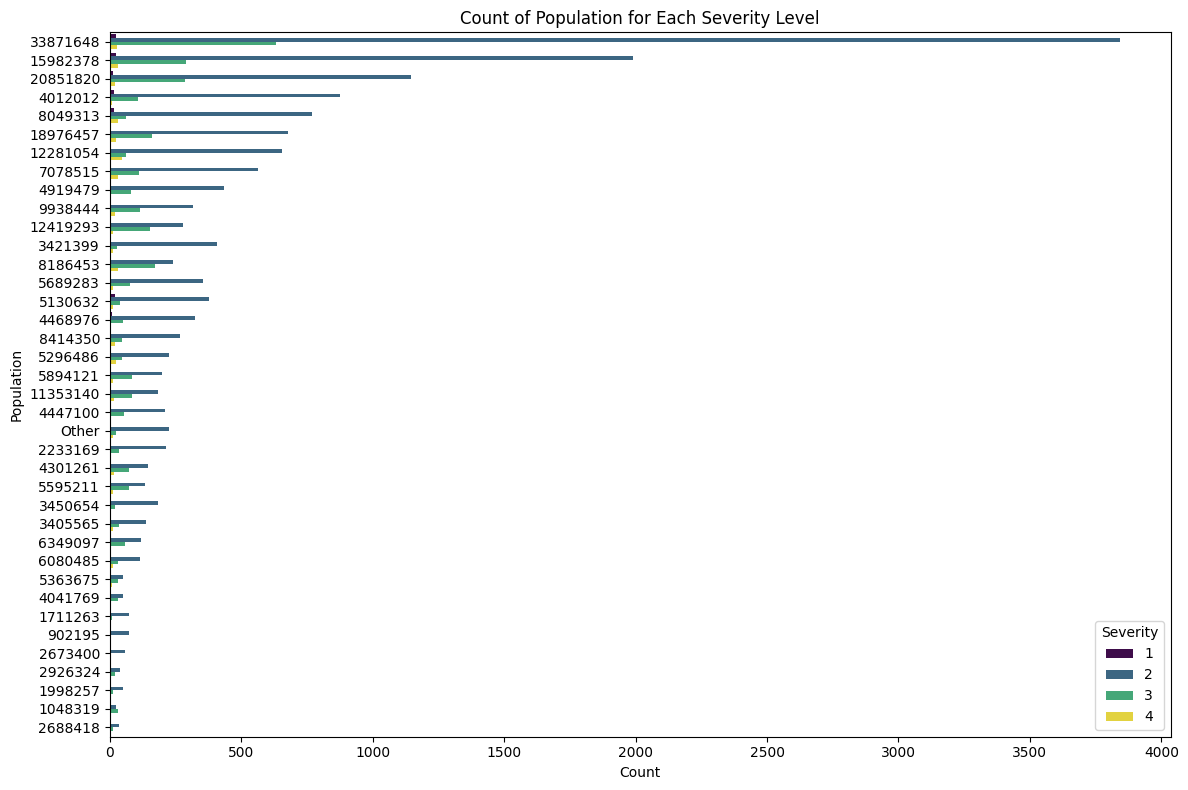

In [13]:
plotData = data.copy()
threshold = 50 
population_types_counts = plotData['Population'].value_counts()
less_frequent = population_types_counts[population_types_counts < threshold].index
plotData['Population'] = plotData['Population'].replace(less_frequent, 'Other')

sorted_road_types = plotData['Population'].value_counts().index

plt.figure(figsize=(12, 8))
sns.countplot(data=plotData, y='Population', hue='Severity', order=sorted_road_types, palette='viridis')

plt.title('Count of Population for Each Severity Level')
plt.xlabel('Count')
plt.ylabel('Population')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19988 entries, 0 to 19987
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Severity         19988 non-null  int64  
 1   Temperature(F)   19988 non-null  float64
 2   Humidity(%)      19988 non-null  float64
 3   Pressure(in)     19988 non-null  float64
 4   Visibility(mi)   19988 non-null  float64
 5   Wind_Speed(mph)  19988 non-null  float64
 6   Road_Type        19988 non-null  object 
 7   Population       19988 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.2+ MB


In [53]:
X = data.drop(columns=['Severity'])
y = data['Severity']

X_encoded = pd.get_dummies(X, columns=['Road_Type'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)



In [16]:
def find_best_parameters(model, parameters, X, y, cv=10, verbose=1, n_jobs=-1):
    grid_object = GridSearchCV(model, parameters, scoring="accuracy", cv=cv, verbose=verbose, n_jobs=n_jobs)
    grid_object = grid_object.fit(X, y)
    return grid_object.best_estimator_

In [30]:
#long time to run
svm = SVC()
parameters = {'C': [1.0, 2.0, 4.0], 
              'gamma': [0.001, 0.1, 1.0, 10.0]}


svm = find_best_parameters(svm, parameters, X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [31]:
random_forest = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = find_best_parameters(random_forest, param_grid, X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [147]:


y_train_categorical = to_categorical(y_train - 1, num_classes=4)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/100


c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6465 - loss: 151427.7500 - val_accuracy: 0.8021 - val_loss: 8263.0732
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6961 - loss: 21671.2090 - val_accuracy: 0.8021 - val_loss: 6835.9585
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6922 - loss: 20500.5293 - val_accuracy: 0.8021 - val_loss: 15310.4229
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6971 - loss: 20694.5859 - val_accuracy: 0.8021 - val_loss: 11214.1191
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6901 - loss: 18727.3711 - val_accuracy: 0.8021 - val_loss: 10118.5156
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6736 - loss: 13260.8066 - val_accuracy: 0.8021 - val_loss: 11543.7539
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6987 - loss: 12484.5791 - val_accuracy: 0.8021 - val_loss: 11449.5312
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

In [148]:
svm_scores = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=10)
random_forest_scores = cross_val_score(random_forest, X_train, y_train, scoring='accuracy', cv=10)
history = model.fit(X_train, y_train_categorical, epochs=200, batch_size=32, validation_split=0.2)
neural_network_scores = history.history['val_accuracy']

Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8003 - loss: 0.6106 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8061 - loss: 0.5991 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8023 - loss: 0.6053 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.6147 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.6160 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8061 - loss: 0.6022 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.6149 - val_accuracy: 0.8021 - val_loss: 0.6140
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8079 - loss: 0.5970 - val_accu

In [149]:
results = [
    ['Random Forest', np.mean(svm_scores)],
    ['Neural Network', np.mean(neural_network_scores)],
    ['SVM', np.mean(random_forest_scores)]
]

results.sort(key = lambda model: model[1])
results = pd.DataFrame(data=results, columns=['Model', 'Score'])
results

,Model,Score
0,Neural Network,0.802064
1,Random Forest,0.803565
2,SVM,0.805441


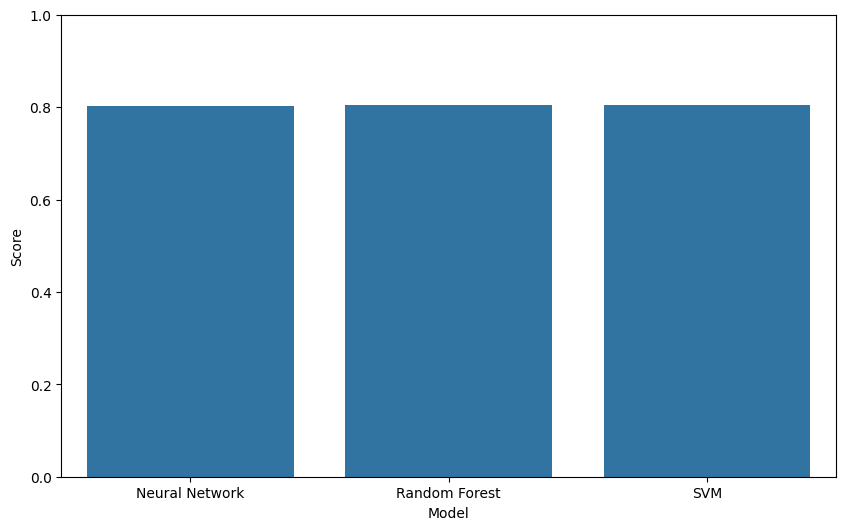

In [150]:
plt.figure(figsize=(10,6))
plot=sns.barplot(x='Model', y='Score', data=results)
plot.set(ylim=(0, 1))
plt.show()

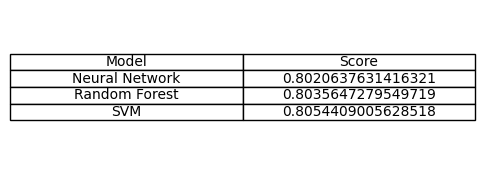

In [151]:
fig, ax = plt.subplots(figsize=(6, 2)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results.values, colLabels=results.columns, cellLoc='center', loc='center')

plt.show()

In [168]:
def runTest(x):
    y_train_categorical = to_categorical(y_train - 1, num_classes=4)
    model = Sequential([
        Dense(64, activation='relu', input_shape=(x.shape[1],)),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    svm_scores = cross_val_score(svm, x, y_train, scoring='accuracy', cv=10)
    random_forest_scores = cross_val_score(random_forest, x, y_train, scoring='accuracy', cv=10)
    history = model.fit(x, y_train_categorical, epochs=200, batch_size=32, validation_split=0.2)
    neural_network_scores = history.history['val_accuracy']
    results = [
    ['Random Forest', np.mean(svm_scores)],
    ['Neural Network', np.mean(neural_network_scores)],
    ['SVM', np.mean(random_forest_scores)]
    ]

    results.sort(key = lambda model: model[1])
    results = pd.DataFrame(data=results, columns=['Model', 'Score'])
    plt.figure(figsize=(10,6))
    plot=sns.barplot(x='Model', y='Score', data=results)
    plot.set(ylim=(0, 1))
    plt.show()
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=results.values, colLabels=results.columns, cellLoc='center', loc='center')
    plt.show()

In [169]:
dataWithoutPopulation = X_train.drop(columns=["Population"])
dataWithoutTemperature = X_train.drop(columns=["Temperature(F)"])
dataWithoutHumidity = X_train.drop(columns=["Humidity(%)"])
dataWithoutPressure = X_train.drop(columns=["Pressure(in)"])
dataWithoutVisibility = X_train.drop(columns=["Visibility(mi)"])
dataWithoutWindSpeed = X_train.drop(columns=["Wind_Speed(mph)"])
dataWithoutRoadType = data.drop(columns=['Severity', 'Road_Type'])
dataWithoutRoadType, X_test, y_train, y_test = train_test_split(dataWithoutRoadType, y, test_size=0.2, random_state=42, stratify=y)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7779 - loss: 0.7928 - val_accuracy: 0.8021 - val_loss: 0.6118
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8035 - loss: 0.6129 - val_accuracy: 0.8011 - val_loss: 0.6191
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8032 - loss: 0.5845 - val_accuracy: 0.8021 - val_loss: 0.5906
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8087 - loss: 0.5706 - val_accuracy: 0.8021 - val_loss: 0.5915
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8029 - loss: 0.5759 - val_accuracy: 0.8021 - val_loss: 0.5823
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8084 - loss: 0.5525 - val_accuracy: 0.8011 - val_loss: 0.5833
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7992 - loss: 0.5791 - val_accuracy: 0.8018 - val_loss: 0.5838
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8017 - loss: 0.5615 - val_accu

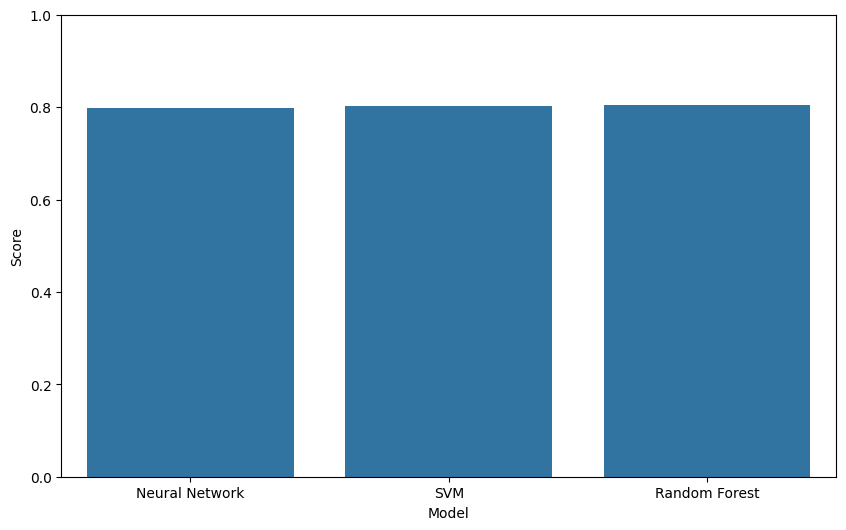

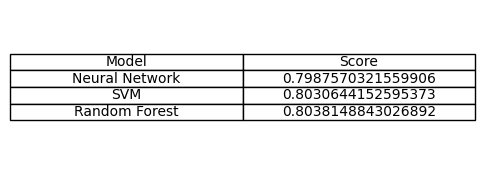

In [167]:
runTest(dataWithoutPopulation)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6621 - loss: 106419.1094 - val_accuracy: 0.1623 - val_loss: 17588.6250
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6687 - loss: 18054.4863 - val_accuracy: 0.8021 - val_loss: 22298.9902
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6853 - loss: 14634.0254 - val_accuracy: 0.1623 - val_loss: 13875.8799
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6899 - loss: 16535.4883 - val_accuracy: 0.8021 - val_loss: 9035.8945
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6803 - loss: 17972.7949 - val_accuracy: 0.8021 - val_loss: 6190.8042
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6863 - loss: 13542.2930 - val_accuracy: 0.8021 - val_loss: 6212.2246
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6721 - loss: 14339.5820 - val_accuracy: 0.8021 - val_loss: 11350.8027
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s

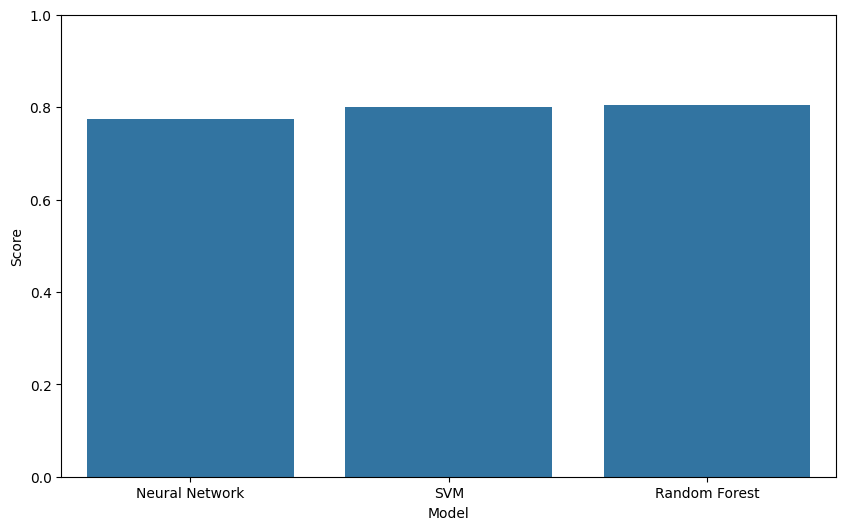

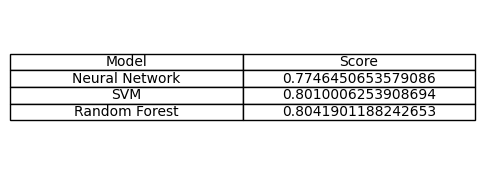

In [170]:
runTest(dataWithoutTemperature)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6680 - loss: 109806.0000 - val_accuracy: 0.8021 - val_loss: 25004.5527
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6856 - loss: 21409.3516 - val_accuracy: 0.8021 - val_loss: 11743.8662
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6966 - loss: 24173.0957 - val_accuracy: 0.1623 - val_loss: 28799.2168
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6789 - loss: 19523.6953 - val_accuracy: 0.8021 - val_loss: 10991.8389
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7005 - loss: 22933.4199 - val_accuracy: 0.8021 - val_loss: 14479.1045
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6931 - loss: 17075.9473 - val_accuracy: 0.8021 - val_loss: 9509.6445
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6818 - loss: 16618.8418 - val_accuracy: 0.8021 - val_loss: 20934.5547
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 

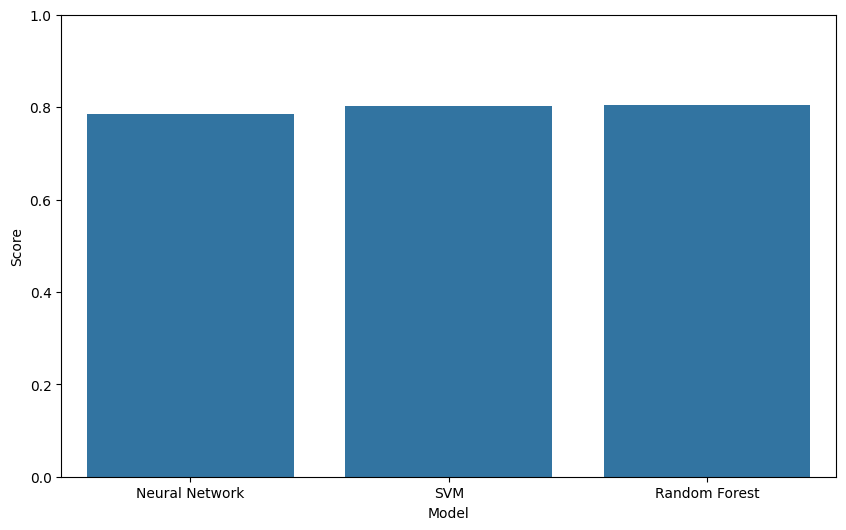

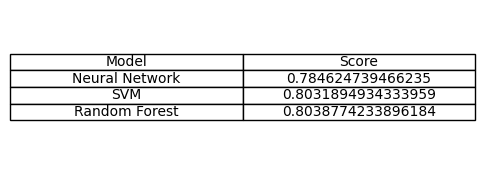

In [172]:
runTest(dataWithoutHumidity)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6669 - loss: 158332.0156 - val_accuracy: 0.8021 - val_loss: 35802.5352
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6846 - loss: 22330.2852 - val_accuracy: 0.8021 - val_loss: 17338.2461
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6929 - loss: 20282.3848 - val_accuracy: 0.8021 - val_loss: 5093.2622
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6727 - loss: 19933.7148 - val_accuracy: 0.1623 - val_loss: 9574.2080
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6867 - loss: 14218.0830 - val_accuracy: 0.8021 - val_loss: 36032.1289
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6845 - loss: 15700.5713 - val_accuracy: 0.8021 - val_loss: 10909.7949
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6793 - loss: 15326.2314 - val_accuracy: 0.8021 - val_loss: 7846.3032
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s

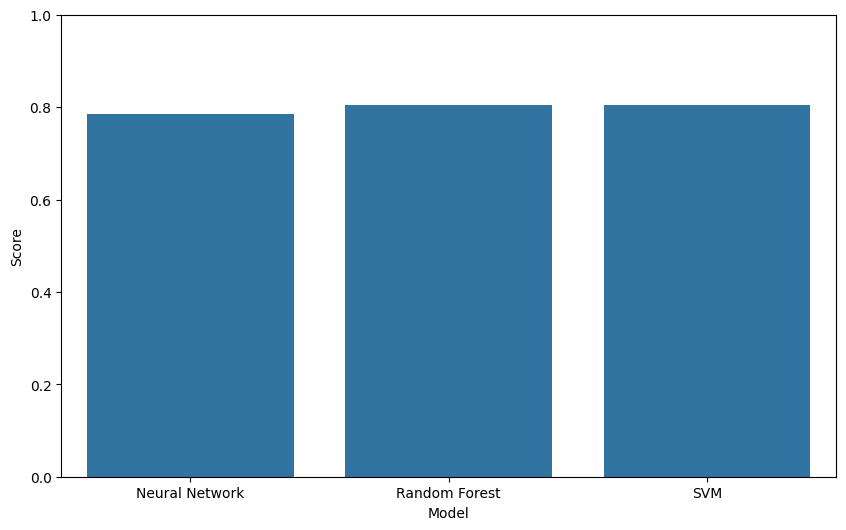

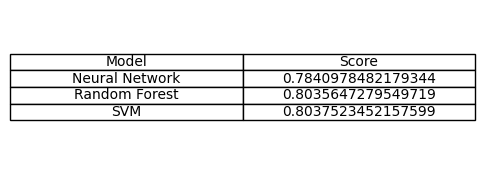

In [173]:
runTest(dataWithoutPressure)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6560 - loss: 87956.1875 - val_accuracy: 0.8021 - val_loss: 48471.1055
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6887 - loss: 23400.0605 - val_accuracy: 0.8021 - val_loss: 14942.8721
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6763 - loss: 18147.5293 - val_accuracy: 0.8021 - val_loss: 8574.8633
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6840 - loss: 14650.0547 - val_accuracy: 0.1623 - val_loss: 3511.6150
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6801 - loss: 14136.2002 - val_accuracy: 0.8021 - val_loss: 41840.9062
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6861 - loss: 15900.8086 - val_accuracy: 0.8021 - val_loss: 3945.0212
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6836 - loss: 14000.4824 - val_accuracy: 0.8021 - val_loss: 19456.5840
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 

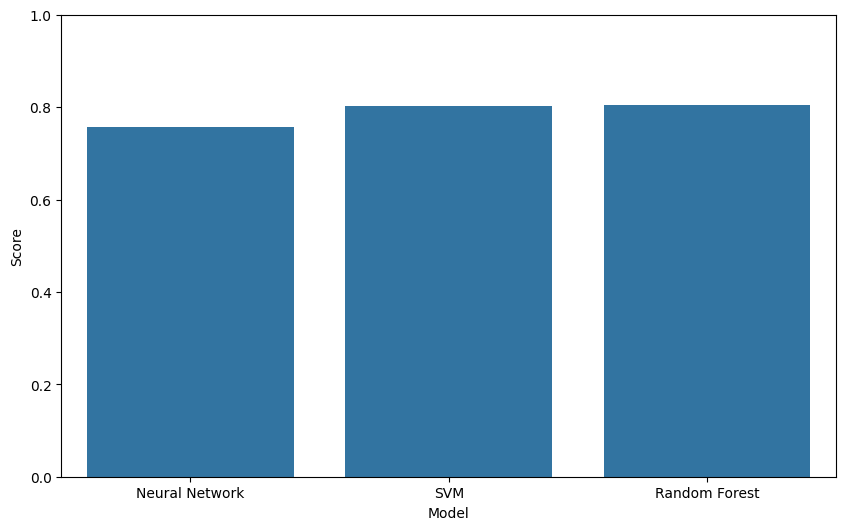

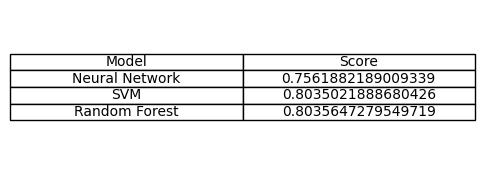

In [174]:
runTest(dataWithoutVisibility)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5712 - loss: 281194.5938 - val_accuracy: 0.8021 - val_loss: 15570.2900
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6838 - loss: 15703.4219 - val_accuracy: 0.8021 - val_loss: 7146.1362
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6652 - loss: 11278.2852 - val_accuracy: 0.8021 - val_loss: 14734.2363
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6783 - loss: 11608.4795 - val_accuracy: 0.8021 - val_loss: 23419.6113
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6763 - loss: 11068.7803 - val_accuracy: 0.8021 - val_loss: 10570.0986
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6950 - loss: 13488.1377 - val_accuracy: 0.8021 - val_loss: 2973.3037
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6950 - loss: 8395.9609 - val_accuracy: 0.8021 - val_loss: 2276.3601
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 

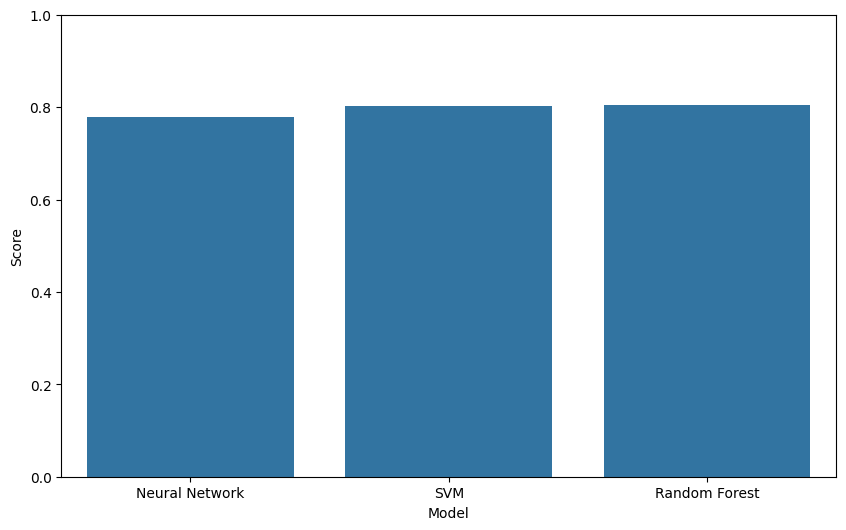

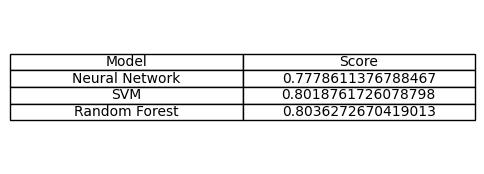

In [175]:
runTest(dataWithoutWindSpeed)

c:\Users\marci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6862 - loss: 96423.5312 - val_accuracy: 0.8021 - val_loss: 29104.8926
Epoch 2/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6887 - loss: 21023.0352 - val_accuracy: 0.1623 - val_loss: 18321.1113
Epoch 3/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6945 - loss: 21447.8828 - val_accuracy: 0.8021 - val_loss: 3738.2195
Epoch 4/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6949 - loss: 18156.9062 - val_accuracy: 0.8021 - val_loss: 31322.2773
Epoch 5/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6782 - loss: 27337.7852 - val_accuracy: 0.1623 - val_loss: 6340.2534
Epoch 6/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6750 - loss: 21831.6289 - val_accuracy: 0.0241 - val_loss: 844.1880
Epoch 7/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6716 - loss: 17874.8750 - val_accuracy: 0.8021 - val_loss: 8441.3027
Epoch 8/200
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

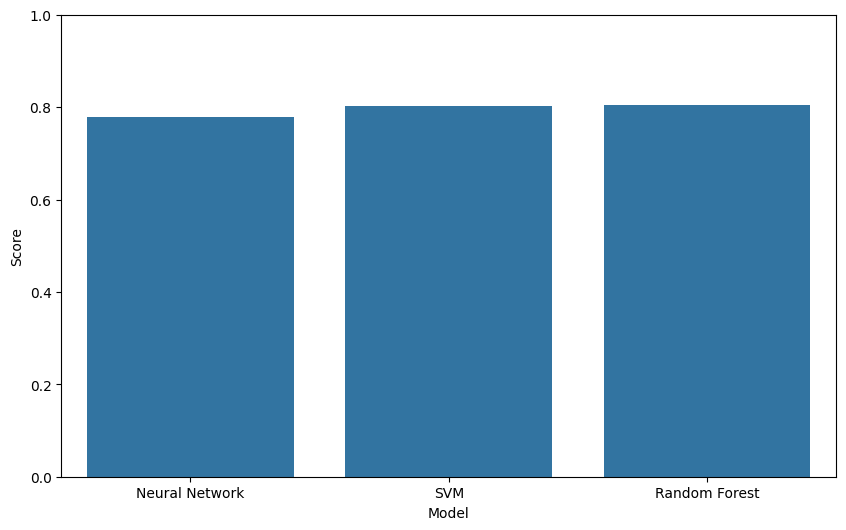

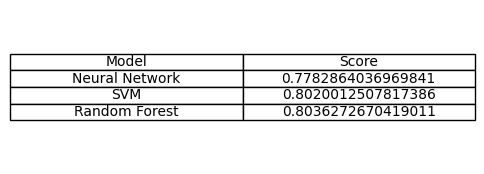

In [176]:
runTest(dataWithoutRoadType)